In [25]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [26]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [27]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [28]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    # placeholder
    y = x**2+4*x -3
    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    # placeholder
    y = x**3+4*x**2 -3
    return x, y

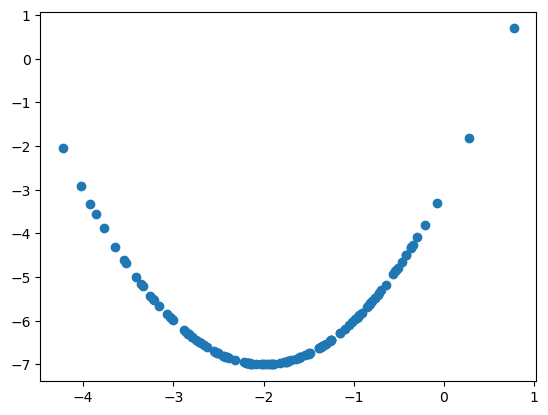

torch.Size([128, 1])


In [17]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x.cpu(),y.cpu())
plt.show()
print(x.size())

In [48]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H,self).__init__()
        
        # TODO
        self.classifier =nn.Linear(1,1)


    def forward(self, x):
        return self.classifier(x)

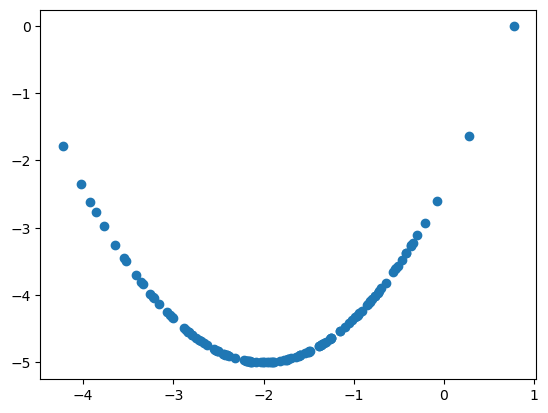

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = Linear_0H()
model1.to(device)
y_h = model1(y)
plt.scatter(x.cpu(),y_h.detach().cpu())
plt.show()

In [65]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        return self.classifier(x)

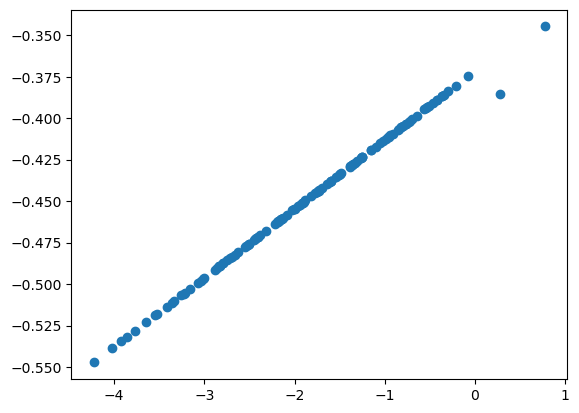

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = Linear_1H()
model1.to(device)
x_h = model1(x)
plt.scatter(x.cpu(),x_h.detach().cpu())
plt.show()

In [72]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1,5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        return self.classifier(x)

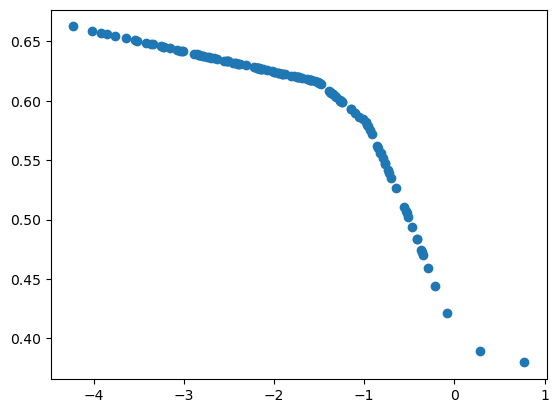

In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = Linear_2H()
model1.to(device)
x_h = model1(x)
plt.scatter(x.cpu(),x_h.detach().cpu())
plt.show()

In [74]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred,y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        # TODO: call backward on loss
        loss.backward()
        # TODO: step the optimizer
        optimizer.step()
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 4.074909210205078
Epoch 200 loss: 2.6842167377471924
Epoch 300 loss: 2.048905849456787
Epoch 400 loss: 1.7586759328842163
Epoch 500 loss: 1.6260902881622314
Epoch 600 loss: 1.5655211210250854
Epoch 700 loss: 1.537851095199585
Epoch 800 loss: 1.5252104997634888
Epoch 900 loss: 1.5194358825683594
Epoch 1000 loss: 1.5167979001998901


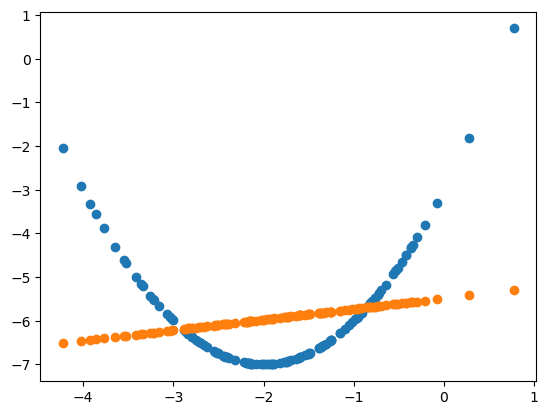

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 0H model on quadratic data
model = Linear_0H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()

Epoch 100 loss: 1.7492727041244507
Epoch 200 loss: 1.5149471759796143
Epoch 300 loss: 1.4905524253845215
Epoch 400 loss: 1.4574894905090332
Epoch 500 loss: 1.3932130336761475
Epoch 600 loss: 1.256415843963623
Epoch 700 loss: 1.0468114614486694
Epoch 800 loss: 0.8161858320236206
Epoch 900 loss: 0.5906822681427002
Epoch 1000 loss: 0.41349363327026367


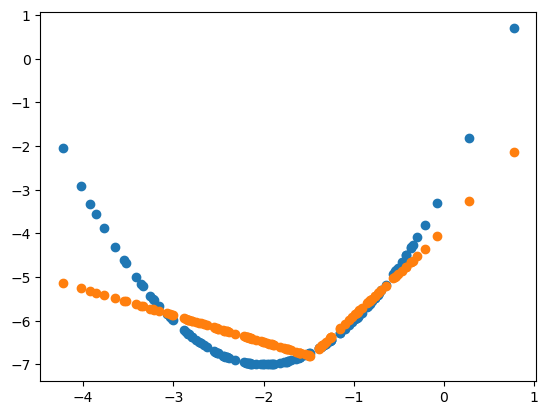

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1H model on quadratic data
model = Linear_1H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()

Epoch 100 loss: 1.2683604955673218
Epoch 200 loss: 0.813055694103241
Epoch 300 loss: 0.3328016996383667
Epoch 400 loss: 0.1805427223443985
Epoch 500 loss: 0.15103034675121307
Epoch 600 loss: 0.21996769309043884
Epoch 700 loss: 0.18614716827869415
Epoch 800 loss: 0.12963968515396118
Epoch 900 loss: 0.1625291109085083
Epoch 1000 loss: 0.1317051649093628


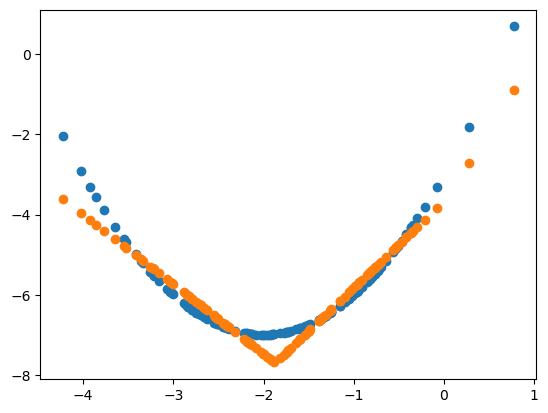

In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 2H model on quadratic data
model = Linear_2H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()

In [80]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 22.611125946044922
Epoch 200 loss: 22.183609008789062
Epoch 300 loss: 21.9591064453125
Epoch 400 loss: 21.841217041015625
Epoch 500 loss: 21.779308319091797
Epoch 600 loss: 21.74679946899414
Epoch 700 loss: 21.729726791381836
Epoch 800 loss: 21.720762252807617
Epoch 900 loss: 21.716053009033203
Epoch 1000 loss: 21.71358299255371


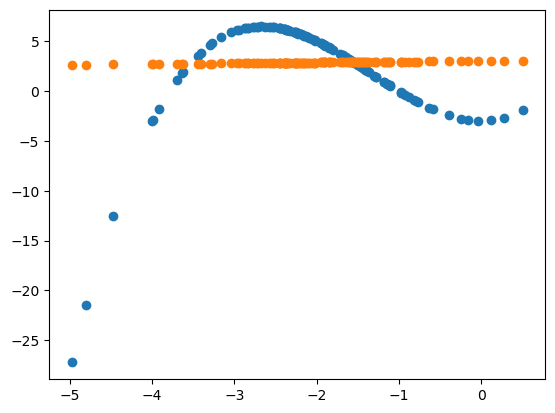

In [81]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 0H model on quadratic data
model = Linear_0H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()

Epoch 100 loss: 19.367992401123047
Epoch 200 loss: 11.100353240966797
Epoch 300 loss: 4.863154411315918
Epoch 400 loss: 2.7403347492218018
Epoch 500 loss: 1.8207004070281982
Epoch 600 loss: 1.2836744785308838
Epoch 700 loss: 0.9853643774986267
Epoch 800 loss: 0.8004614114761353
Epoch 900 loss: 0.7287611365318298
Epoch 1000 loss: 0.6448441743850708


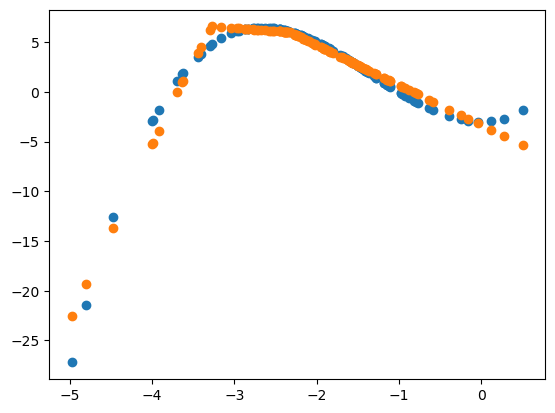

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 1H model on quadratic data
model = Linear_1H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data 
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()

Epoch 100 loss: 21.466075897216797
Epoch 200 loss: 14.150578498840332
Epoch 300 loss: 9.374208450317383
Epoch 400 loss: 5.259884834289551
Epoch 500 loss: 3.7446348667144775
Epoch 600 loss: 3.044449806213379
Epoch 700 loss: 2.5092620849609375
Epoch 800 loss: 1.9434477090835571
Epoch 900 loss: 1.64836847782135
Epoch 1000 loss: 1.7101271152496338


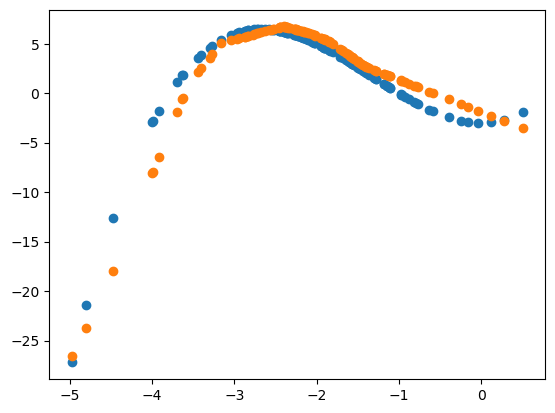

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 2H model on quadratic data
model = Linear_2H()
model.to(device)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x.cpu(), y.cpu())
plt.scatter(x.cpu(), y_pred.cpu())
plt.show()